# Rendering development

One thing I want to test is how to make sure that the PALM is rendered the same regardless of histogram or Gaussian.

In [1]:
%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
sns.set()

In [2]:
def gauss(xdata, x0, sigma_x):
    return 1 / np.sqrt(2 * np.pi * sigma_x**2) * np.exp(-(xdata - x0)**2 / 2 / sigma_x**2)

In [3]:
x0s, sigmas = np.random.randn(2, 20000)

In [4]:
xdata = np.linspace(-5, 5, 1001)
xdata

array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ])

In [5]:
step = np.diff(xdata).mean()
xbins = np.concatenate((xdata - step/2, [xdata[-1] + step/2]))

In [6]:
g = gauss(xdata[None], x0s[:, None], 0.1*sigmas[:, None])

In [7]:
h = np.histogram(x0s, xbins)

<IPython.core.display.Javascript object>


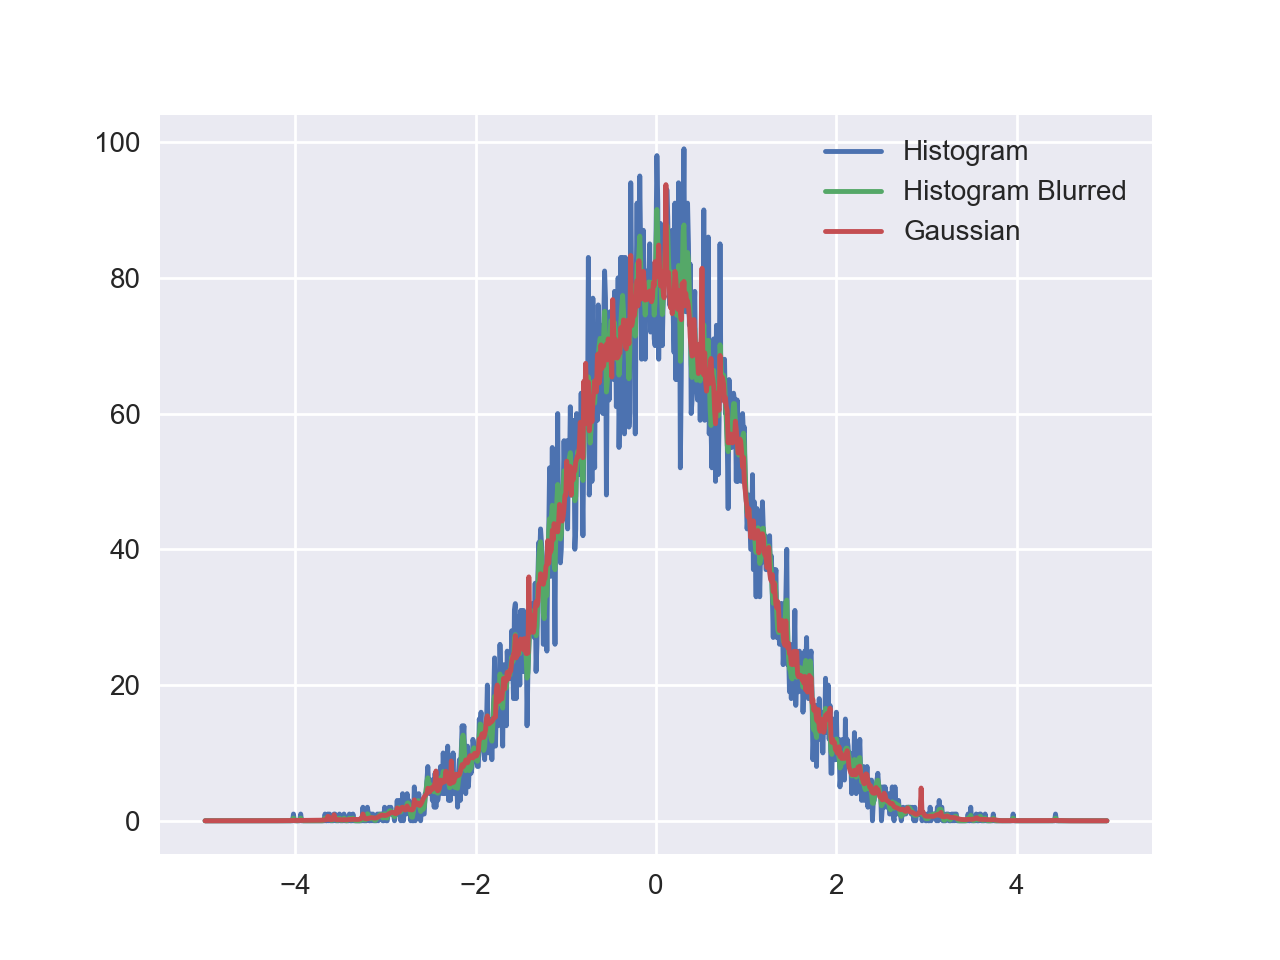

In [8]:
fig, ax0 = plt.subplots(1)
ax0.plot(xdata, h[0], label="Histogram")
ax0.plot(xdata, gaussian_filter1d(h[0].astype(float), 1), label="Histogram Blurred")
ax0.plot(xdata, g.sum(0) * step, label="Gaussian")
ax0.legend()

# Everything looks good!